In [1]:
import sys
sys.path.append('../')

In [2]:
import sklearn as sk

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from icecream import ic

from radiousAngleMethod import radiousAngleMethod
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler

from sklearn.datasets import make_blobs

#from numericalResults import correlationResults
from numericalResults import dataResults
from plotting import plot_data

import time

In [3]:
iris = sk.datasets.load_iris()
wine = sk.datasets.load_wine()
cancer = sk.datasets.load_breast_cancer()
diabetes = sk.datasets.load_diabetes()

In [4]:
pca = sk.decomposition.PCA(n_components=2)

In [5]:
pca.fit(iris.data)
iris_pca = pca.transform(iris.data)

In [6]:
pca.fit(wine.data)
wine_pca = pca.transform(wine.data)

In [7]:
pca.fit(cancer.data)
cancer_pca = pca.transform(cancer.data)

In [8]:
standard_scaler = sk.preprocessing.StandardScaler()

iris_standard = standard_scaler.fit_transform(iris_pca)
wine_standard = standard_scaler.fit_transform(wine_pca)
cancer_standard = standard_scaler.fit_transform(cancer_pca)

In [9]:
cancer_data_default = cancer
cancer_data = pca.fit_transform(cancer_data_default.data)
cancer_data = standard_scaler.fit_transform(cancer_data)

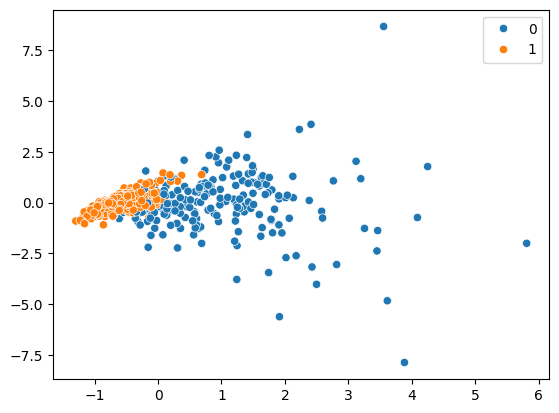

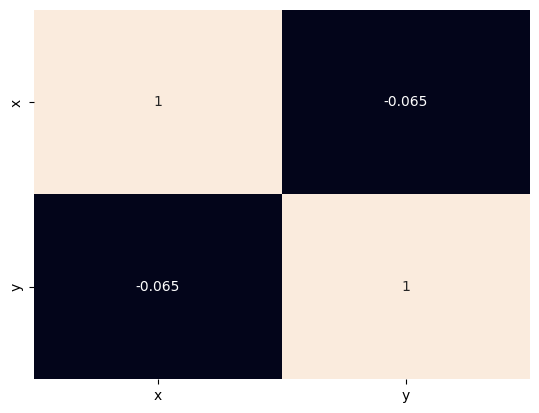

ic| unique_class: np.int64(0)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(-0.06485154139205583), pvalue=np.float64(0.34739220025414985))
ic| pearson_cov: PearsonRResult(statistic=np.float64(9.332812300755222e-15), pvalue=np.float64(0.9999999999998203))
    variance: np.float64(1.0000000000000089)
    desc:             Default
          count  5.690000e+02
          mean   1.717041e-17
          std    1.000880e+00
          min   -3.105877e+00
          25%   -6.058157e-01
          50%   -1.767331e-01
          75%    3.655205e-01
          max    8.759374e+00


---------------------------------------------------------------------------------------------------------------


(PearsonRResult(statistic=np.float64(9.332812300755222e-15), pvalue=np.float64(0.9999999999998203)),
 np.float64(1.0000000000000089),
             Default
 count  5.690000e+02
 mean   1.717041e-17
 std    1.000880e+00
 min   -3.105877e+00
 25%   -6.058157e-01
 50%   -1.767331e-01
 75%    3.655205e-01
 max    8.759374e+00)

In [10]:
sns.scatterplot(x=cancer_data[:, 0], y=cancer_data[:, 1], hue=cancer_data_default.target)
plt.show()

dataResults(cancer_standard, cancer_data_default.target, cancer_data_default.target, 'Default')

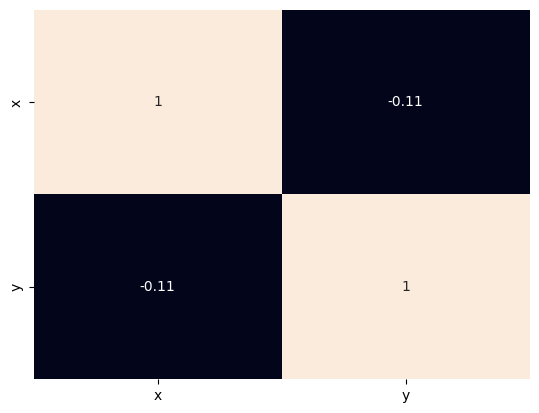

ic| unique_class: np.int64(0)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(-0.11109864084984278), pvalue=np.float64(0.03614226024840103))
ic| pearson_cov: PearsonRResult(statistic=np.float64(-0.0659861227545876), pvalue=np.float64(0.07827339987936574))
    variance: np.float64(1.424479385769136)
    desc:                 RAM
          count  7.130000e+02
          mean   1.245692e-17
          std    1.194353e+00
          min   -8.639998e+00
          25%   -2.338397e-01
          50%    2.621891e-01
          75%    5.348357e-01
          max    7.161180e+00


---------------------------------------------------------------------------------------------------------------


(PearsonRResult(statistic=np.float64(-0.0659861227545876), pvalue=np.float64(0.07827339987936574)),
 np.float64(1.424479385769136),
                 RAM
 count  7.130000e+02
 mean   1.245692e-17
 std    1.194353e+00
 min   -8.639998e+00
 25%   -2.338397e-01
 50%    2.621891e-01
 75%    5.348357e-01
 max    7.161180e+00)

In [11]:
#RAM
ram_data = cancer_data.copy()

cancer_RAM_x, cancer_RAM_y = radiousAngleMethod(ram_data, cancer_data_default.target, 7)

plot_data(cancer_data, cancer_data_default.target, cancer_RAM_x, cancer_RAM_y)

dataResults(cancer_RAM_x, cancer_RAM_y, cancer_data_default.target, 'RAM')

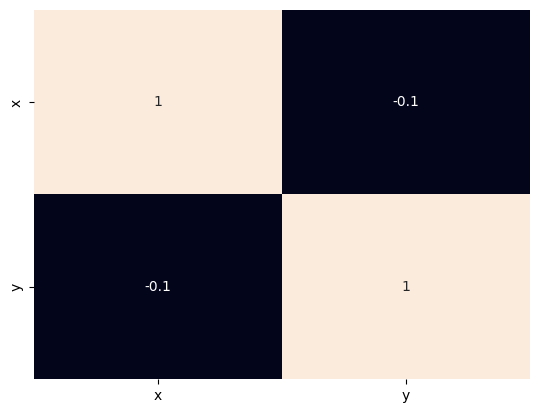

ic| unique_class: np.int64(0)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(-0.10354161371994158), pvalue=np.float64(0.05061175891900019))
ic| pearson_cov: PearsonRResult(statistic=np.float64(-0.03875461704146604), pvalue=np.float64(0.3010764966208789))
    variance: np.float64(1.207706758212461)
    desc:               SMOTE
          count  7.140000e+02
          mean   4.478211e-17
          std    1.099728e+00
          min   -2.453231e+00
          25%   -6.740816e-01
          50%   -4.503771e-01
          75%    3.132770e-01
          max    7.639752e+00


---------------------------------------------------------------------------------------------------------------


(PearsonRResult(statistic=np.float64(-0.03875461704146604), pvalue=np.float64(0.3010764966208789)),
 np.float64(1.207706758212461),
               SMOTE
 count  7.140000e+02
 mean   4.478211e-17
 std    1.099728e+00
 min   -2.453231e+00
 25%   -6.740816e-01
 50%   -4.503771e-01
 75%    3.132770e-01
 max    7.639752e+00)

In [12]:
#SMOTE
smote_data = cancer_data.copy()

cancer_SMOTE_x, cancer_SMOTE_y = SMOTE().fit_resample(smote_data, cancer_data_default.target)

plot_data(cancer_data, cancer_data_default.target, cancer_SMOTE_x, cancer_SMOTE_y)

dataResults(cancer_SMOTE_x, cancer_SMOTE_y, cancer_data_default.target, 'SMOTE')

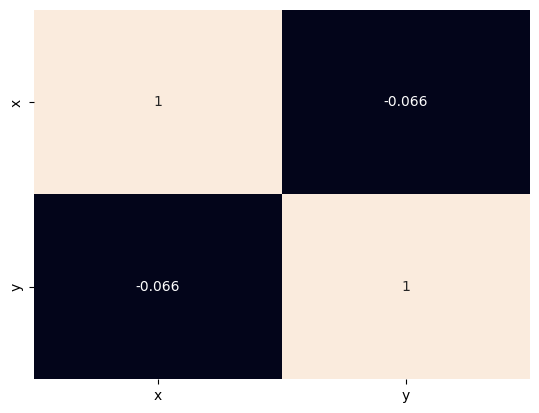

ic| unique_class: np.int64(0)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(-0.06612812465584408), pvalue=np.float64(0.21651662621966322))
ic| pearson_cov: PearsonRResult(statistic=np.float64(0.02470901771543311), pvalue=np.float64(0.5115650553077803))
    variance: np.float64(0.8949354953822926)
    desc:              ADASYN
          count  7.080000e+02
          mean  -5.017957e-18
          std    9.466791e-01
          min   -6.476348e+00
          25%   -4.875843e-01
          50%   -9.810550e-02
          75%    3.920826e-01
          max    9.275119e+00


---------------------------------------------------------------------------------------------------------------


(PearsonRResult(statistic=np.float64(0.02470901771543311), pvalue=np.float64(0.5115650553077803)),
 np.float64(0.8949354953822926),
              ADASYN
 count  7.080000e+02
 mean  -5.017957e-18
 std    9.466791e-01
 min   -6.476348e+00
 25%   -4.875843e-01
 50%   -9.810550e-02
 75%    3.920826e-01
 max    9.275119e+00)

In [13]:
#ADASYN
adasyn_data = cancer_data.copy()

cancer_ADASYN_x, cancer_ADASYN_y = ADASYN().fit_resample(adasyn_data, cancer_data_default.target)

plot_data(cancer_data, cancer_data_default.target, cancer_ADASYN_x, cancer_ADASYN_y)

dataResults(cancer_ADASYN_x, cancer_ADASYN_y, cancer_data_default.target, 'ADASYN')

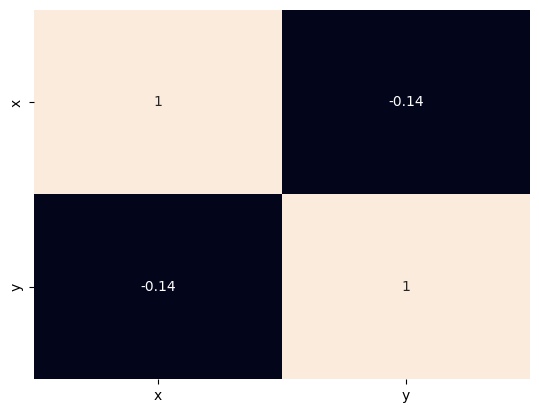

ic| unique_class: np.int64(0)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(-0.13748370718919595), pvalue=np.float64(0.009297146279321607))
ic| pearson_cov: PearsonRResult(statistic=np.float64(-0.10092716053624637), pvalue=np.float64(0.0069543641153062994))
    variance: np.float64(1.3577522937866224)
    desc:                 ROS
          count  7.140000e+02
          mean  -4.478211e-17
          std    1.166043e+00
          min   -8.589806e+00
          25%   -2.299521e-01
          50%    2.757821e-01
          75%    5.667566e-01
          max    5.710937e+00


---------------------------------------------------------------------------------------------------------------


(PearsonRResult(statistic=np.float64(-0.10092716053624637), pvalue=np.float64(0.0069543641153062994)),
 np.float64(1.3577522937866224),
                 ROS
 count  7.140000e+02
 mean  -4.478211e-17
 std    1.166043e+00
 min   -8.589806e+00
 25%   -2.299521e-01
 50%    2.757821e-01
 75%    5.667566e-01
 max    5.710937e+00)

In [14]:
#random oversampling
ros = RandomOverSampler(random_state=0)
ros_data = cancer_data.copy()

cancer_ROS_x, cancer_ROS_y = ros.fit_resample(ros_data, cancer_data_default.target)

plot_data(cancer_data, cancer_data_default.target, cancer_ROS_x, cancer_ROS_y)

dataResults(cancer_ROS_x, cancer_ROS_y, cancer_data_default.target, 'ROS')

In [15]:
wine_data_default = wine
wine_data = pca.fit_transform(wine_data_default.data)
wine_data = standard_scaler.fit_transform(wine_data)

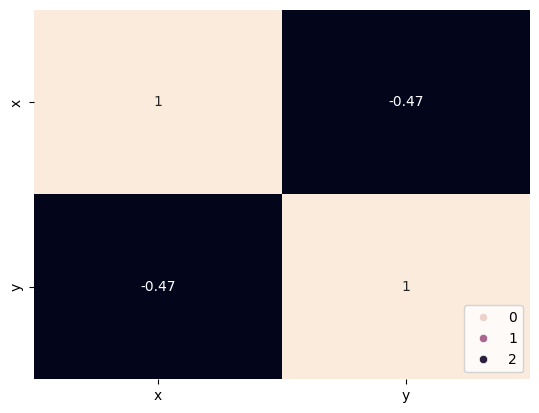

ic| unique_class: np.int64(0)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(-0.4659212698004527), pvalue=np.float64(0.0002000969178045956))


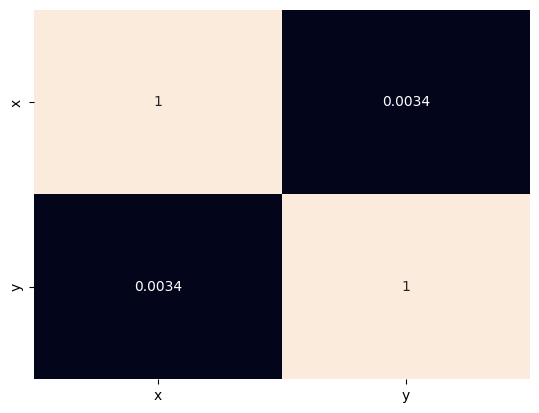

ic| unique_class: np.int64(2)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(0.0034424816098200875), pvalue=np.float64(0.9814735267061275))
ic| pearson_cov: PearsonRResult(statistic=np.float64(1.1796119636642288e-15), pvalue=np.float64(0.9999999999999879))
    variance: np.float64(1.0000000000000009)
    desc:             Default
          count  1.780000e+02
          mean   3.991813e-17
          std    1.002821e+00
          min   -1.815035e+00
          25%   -8.748825e-01
          50%   -9.052722e-03
          75%    5.702223e-01
          max    3.728698e+00


---------------------------------------------------------------------------------------------------------------


(PearsonRResult(statistic=np.float64(1.1796119636642288e-15), pvalue=np.float64(0.9999999999999879)),
 np.float64(1.0000000000000009),
             Default
 count  1.780000e+02
 mean   3.991813e-17
 std    1.002821e+00
 min   -1.815035e+00
 25%   -8.748825e-01
 50%   -9.052722e-03
 75%    5.702223e-01
 max    3.728698e+00)

In [16]:
sns.scatterplot(x=wine_data[:, 0], y=wine_data[:, 1], hue=wine_data_default.target)
dataResults(wine_standard, wine_data_default.target, wine_data_default.target, 'Default')

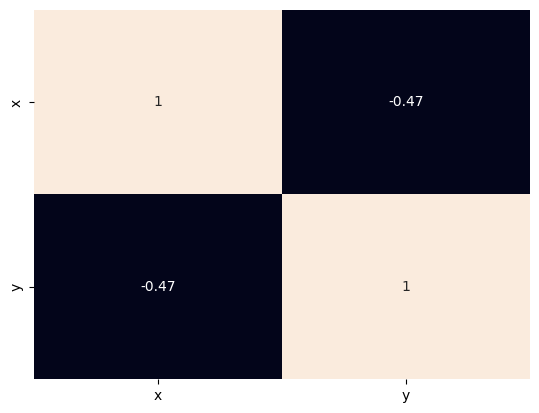

ic| unique_class: np.int64(0)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(-0.4659212698004527), pvalue=np.float64(0.0002000969178045956))


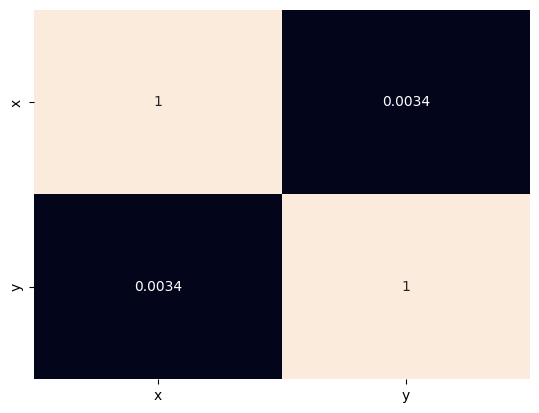

ic| unique_class: np.int64(2)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(0.0034424816098200875), pvalue=np.float64(0.9814735267061275))
ic| pearson_cov: PearsonRResult(statistic=np.float64(1.1796119636642288e-15), pvalue=np.float64(0.9999999999999879))
    variance: np.float64(1.0000000000000009)
    desc:             Default
          count  1.780000e+02
          mean   3.991813e-17
          std    1.002821e+00
          min   -1.815035e+00
          25%   -8.748825e-01
          50%   -9.052722e-03
          75%    5.702223e-01
          max    3.728698e+00


---------------------------------------------------------------------------------------------------------------


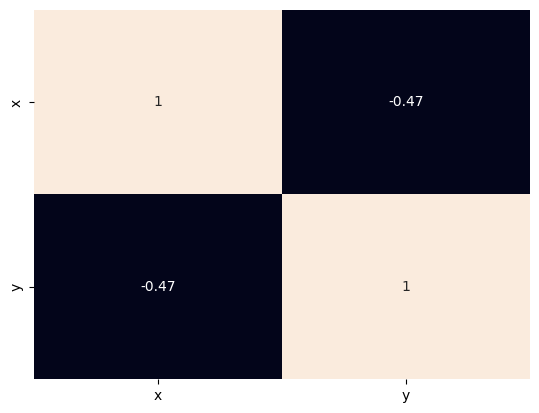

ic| unique_class: np.int64(0)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(-0.46519596782049), pvalue=np.float64(0.00018036790034140756))


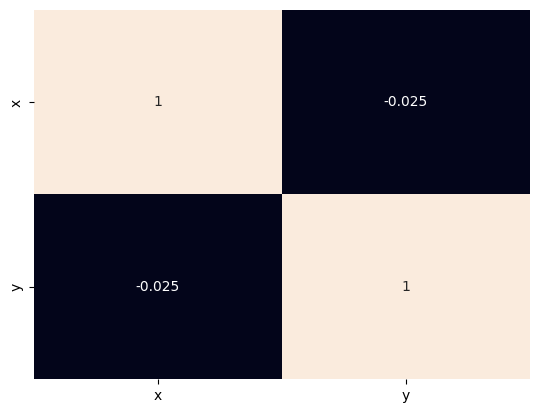

ic| unique_class: np.int64(2)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(-0.024964205266488678), pvalue=np.float64(0.85112742228362))
ic| pearson_cov: PearsonRResult(statistic=np.float64(-0.003394739489527114), pvalue=np.float64(0.9629240070385079))
    variance: np.float64(0.9641976110384292)
    desc:                 RAM
          count  1.900000e+02
          mean   3.739699e-17
          std    9.845299e-01
          min   -2.364711e+00
          25%   -5.916218e-01
          50%   -2.005511e-02
          75%    5.079431e-01
          max    3.338852e+00


---------------------------------------------------------------------------------------------------------------


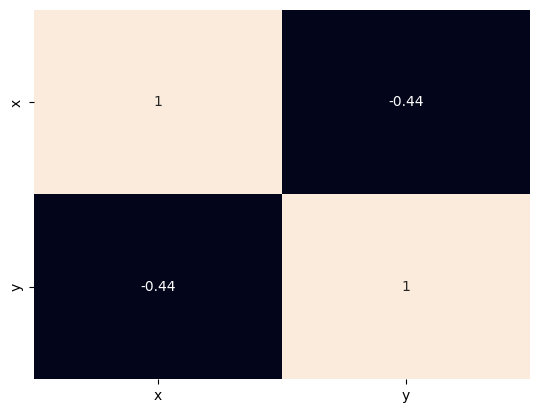

ic| unique_class: np.int64(0)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(-0.4430137746722328), pvalue=np.float64(0.00010933073106169923))


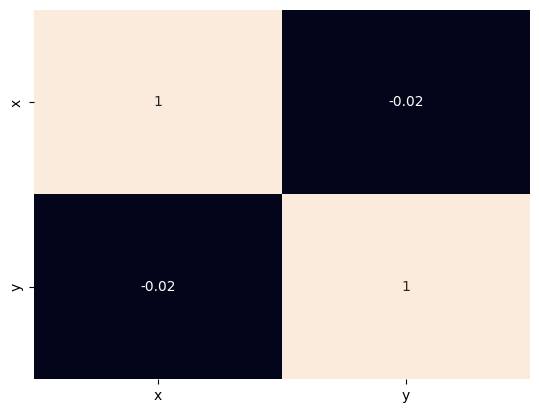

ic| unique_class: np.int64(2)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(-0.020302257971222367), pvalue=np.float64(0.8665434238254425))
ic| pearson_cov: PearsonRResult(statistic=np.float64(-0.013493472665303027), pvalue=np.float64(0.8447817120884817))
    variance: np.float64(0.9454096739652593)
    desc:               SMOTE
          count  2.130000e+02
          mean  -5.003822e-17
          std    9.746123e-01
          min   -2.365308e+00
          25%   -5.864058e-01
          50%    8.627024e-03
          75%    5.664851e-01
          max    3.235273e+00


---------------------------------------------------------------------------------------------------------------


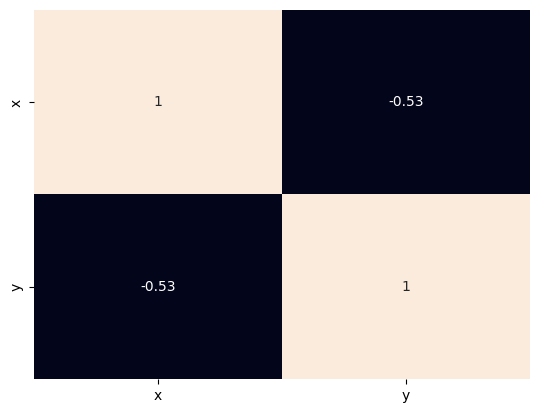

ic| unique_class: np.int64(0)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(-0.5275752026357733), pvalue=np.float64(1.6185332291985964e-06))


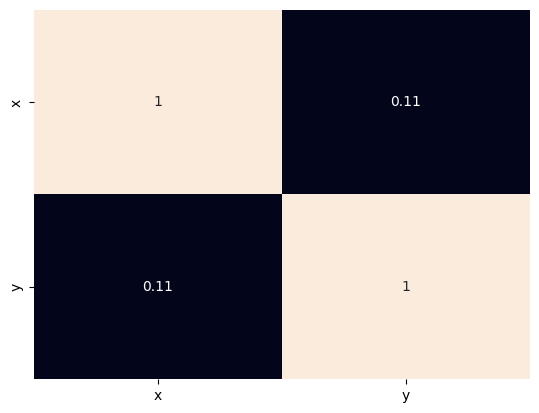

ic| unique_class: np.int64(2)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(0.10869901918937994), pvalue=np.float64(0.366879300981381))
ic| pearson_cov: PearsonRResult(statistic=np.float64(0.03067334887015782), pvalue=np.float64(0.6546996600641104))
    variance: np.float64(0.965916272401493)
    desc:              ADASYN
          count  2.150000e+02
          mean  -2.065531e-17
          std    9.851040e-01
          min   -2.169896e+00
          25%   -7.905461e-01
          50%   -1.307226e-01
          75%    5.233900e-01
          max    4.450645e+00


---------------------------------------------------------------------------------------------------------------


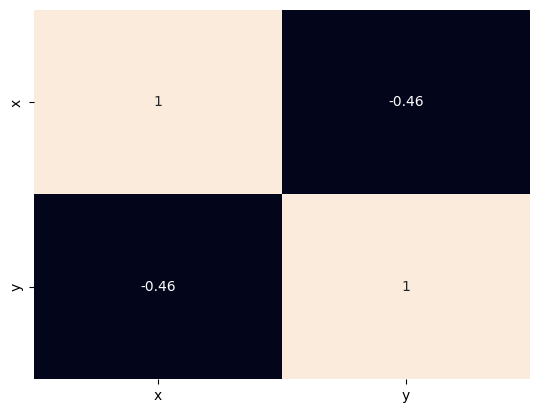

ic| unique_class: np.int64(0)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(-0.45973599713811975), pvalue=np.float64(5.499803843092303e-05))


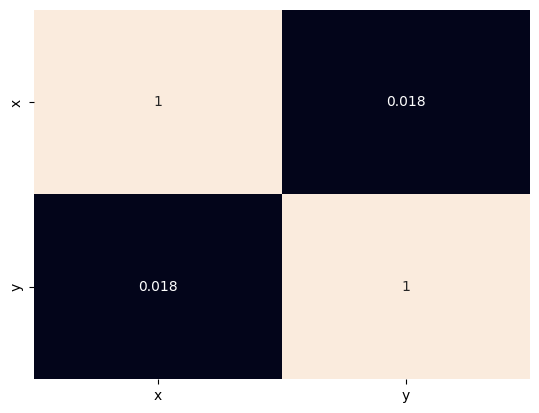

ic| unique_class: np.int64(2)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(0.01774444536919545), pvalue=np.float64(0.8832307246266631))
ic| pearson_cov: PearsonRResult(statistic=np.float64(-0.00068126522133009), pvalue=np.float64(0.9921136522819708))
    variance: np.float64(0.9614187457614816)
    desc:               ROS
          count  213.000000
          mean     0.000000
          std      0.982829
          min     -2.108109
          25%     -0.647348
          50%     -0.195045
          75%      0.439237
          max      4.404158


---------------------------------------------------------------------------------------------------------------


(PearsonRResult(statistic=np.float64(-0.00068126522133009), pvalue=np.float64(0.9921136522819708)),
 np.float64(0.9614187457614816),
               ROS
 count  213.000000
 mean     0.000000
 std      0.982829
 min     -2.108109
 25%     -0.647348
 50%     -0.195045
 75%      0.439237
 max      4.404158)

In [17]:
ram_data = wine_data.copy()
smote_data = wine_data.copy()
adasyn_data = wine_data.copy()
ros_data = wine_data.copy()

wine_RAM_x, wine_RAM_y = radiousAngleMethod(ram_data, wine_data_default.target, 7)

wine_SMOTE_x, wine_SMOTE_y = SMOTE().fit_resample(smote_data, wine_data_default.target)

wine_ADASYN_x, wine_ADASYN_y = ADASYN().fit_resample(adasyn_data, wine_data_default.target)

ros = RandomOverSampler(random_state=0)
wine_ROS_x, wine_ROS_y = ros.fit_resample(ros_data, wine_data_default.target)


plot_data(wine_data, wine_data_default.target, wine_RAM_x, wine_RAM_y)

dataResults(wine_standard, wine_data_default.target, wine_data_default.target, 'Default')
dataResults(wine_RAM_x, wine_RAM_y, wine_data_default.target, 'RAM')
dataResults(wine_SMOTE_x, wine_SMOTE_y, wine_data_default.target, 'SMOTE')
dataResults(wine_ADASYN_x, wine_ADASYN_y, wine_data_default.target, 'ADASYN')
dataResults(wine_ROS_x, wine_ROS_y, wine_data_default.target, 'ROS')

<Axes: >

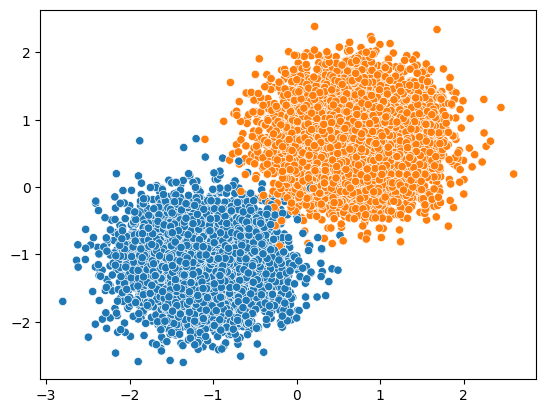

In [18]:
blob_data, blob_features = make_blobs(n_samples=[5000, 8000], centers=[[-2, -2], [2, 2]], n_features=2, random_state=1)

blob_data = standard_scaler.fit_transform(blob_data)

sns.scatterplot(x=blob_data[:, 0], y=blob_data[:, 1], hue=blob_features, legend=False)

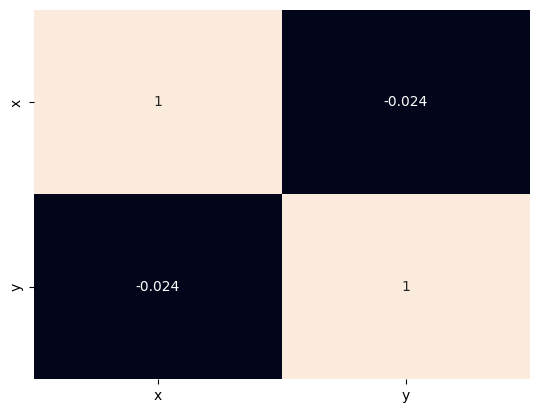

ic| unique_class: np.int64(0)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(-0.02400722350488151), pvalue=np.float64(0.08962347537344091))
ic| pearson_cov: PearsonRResult(statistic=np.float64(0.7898423430815839), pvalue=np.float64(0.0))
    variance: np.float64(1.7898423430815822)
    desc:             Default
          count  1.300000e+04
          mean   2.514228e-17
          std    1.337901e+00
          min   -3.339159e+00
          25%   -1.425754e+00
          50%    5.881874e-01
          75%    1.101796e+00
          max    2.842029e+00


---------------------------------------------------------------------------------------------------------------


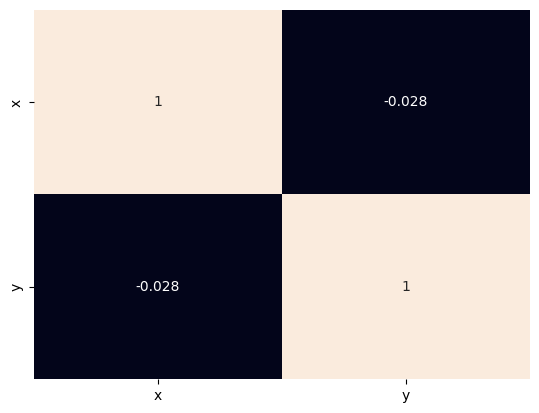

ic| unique_class: np.int64(0)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(-0.028256377997848733), pvalue=np.float64(0.011438261107376817))
ic| pearson_cov: PearsonRResult(statistic=np.float64(0.797549787083234), pvalue=np.float64(0.0))
    variance: np.float64(1.8743640543521165)
    desc:                 RAM
          count  1.601000e+04
          mean  -1.988277e-16
          std    1.369117e+00
          min   -3.041370e+00
          25%   -1.296451e+00
          50%   -3.493403e-02
          75%    1.294322e+00
          max    3.139623e+00


---------------------------------------------------------------------------------------------------------------


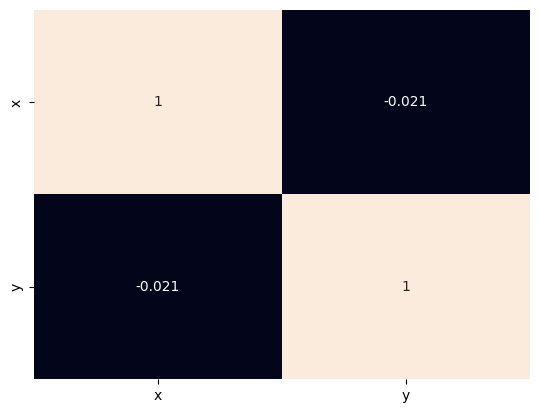

ic| unique_class: np.int64(0)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(-0.02096641529999338), pvalue=np.float64(0.06076435221459349))
ic| pearson_cov: PearsonRResult(statistic=np.float64(0.7985150816962395), pvalue=np.float64(0.0))
    variance: np.float64(1.8851745519077245)
    desc:               SMOTE
          count  1.600000e+04
          mean   2.842171e-16
          std    1.373059e+00
          min   -3.038379e+00
          25%   -1.293846e+00
          50%   -1.852959e-02
          75%    1.297206e+00
          max    3.142946e+00


---------------------------------------------------------------------------------------------------------------


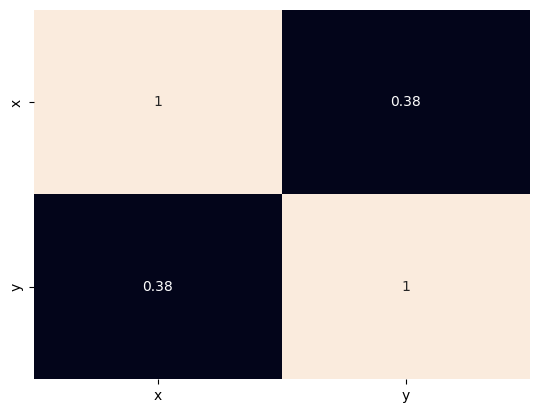

ic| unique_class: np.int64(0)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(0.38031049364341185), pvalue=np.float64(3.982737391693254e-274))
ic| pearson_cov: PearsonRResult(statistic=np.float64(0.7524492001285905), pvalue=np.float64(0.0))
    variance: np.float64(1.4822825527049661)
    desc:              ADASYN
          count  1.601300e+04
          mean  -9.229557e-17
          std    1.217528e+00
          min   -3.264003e+00
          25%   -1.132191e+00
          50%    4.270617e-02
          75%    1.071476e+00
          max    2.917108e+00


---------------------------------------------------------------------------------------------------------------


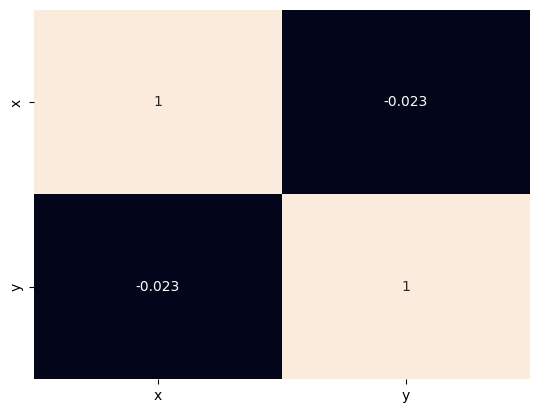

ic| unique_class: np.int64(0)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(-0.023453746064919526), pvalue=np.float64(0.03592921979348855))
ic| pearson_cov: PearsonRResult(statistic=np.float64(0.7985110764617698), pvalue=np.float64(0.0))
    variance: np.float64(1.8799405790767532)
    desc:                 ROS
          count  1.600000e+04
          mean  -4.831691e-16
          std    1.371152e+00
          min   -3.039984e+00
          25%   -1.291505e+00
          50%   -2.013098e-02
          75%    1.295598e+00
          max    3.141347e+00


---------------------------------------------------------------------------------------------------------------


(PearsonRResult(statistic=np.float64(0.7985110764617698), pvalue=np.float64(0.0)),
 np.float64(1.8799405790767532),
                 ROS
 count  1.600000e+04
 mean  -4.831691e-16
 std    1.371152e+00
 min   -3.039984e+00
 25%   -1.291505e+00
 50%   -2.013098e-02
 75%    1.295598e+00
 max    3.141347e+00)

In [19]:
ram_data = blob_data.copy()
smote_data = blob_data.copy()
adasyn_data = blob_data.copy()
ros_data = blob_data.copy()

blob_RAM_x, blob_RAM_y = radiousAngleMethod(ram_data, blob_features, 7)

blob_SMOTE_x, blob_SMOTE_y = SMOTE().fit_resample(smote_data, blob_features)

blob_ADASYN_x, blob_ADASYN_y = ADASYN().fit_resample(adasyn_data, blob_features)

ros = RandomOverSampler(random_state=0)
blob_ROS_x, blob_ROS_y = ros.fit_resample(ros_data, blob_features)

dataResults(blob_data, blob_features, blob_features, 'Default')
dataResults(blob_RAM_x, blob_RAM_y, blob_features, 'RAM')
dataResults(blob_SMOTE_x, blob_SMOTE_y, blob_features, 'SMOTE')
dataResults(blob_ADASYN_x, blob_ADASYN_y, blob_features, 'ADASYN')
dataResults(blob_ROS_x, blob_ROS_y, blob_features, 'ROS')

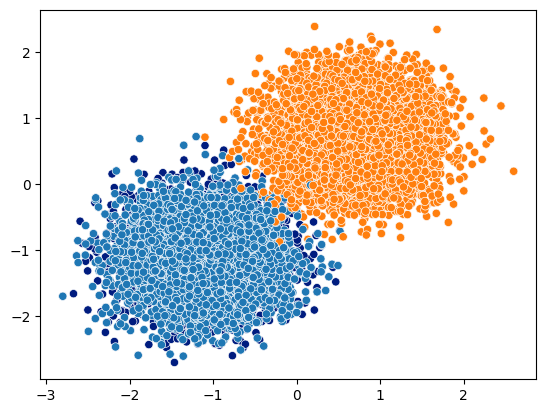

In [20]:
plot_data(blob_data, blob_features, blob_RAM_x, blob_RAM_y)

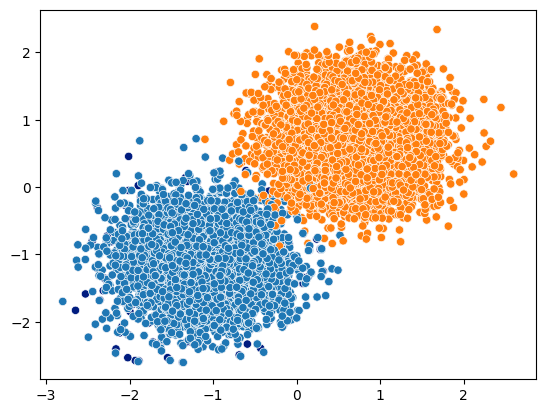

In [21]:
plot_data(blob_data, blob_features, blob_SMOTE_x, blob_SMOTE_y)

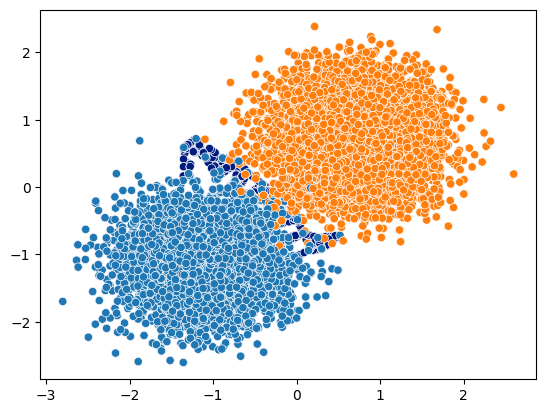

In [22]:
plot_data(blob_data, blob_features, blob_ADASYN_x, blob_ADASYN_y)

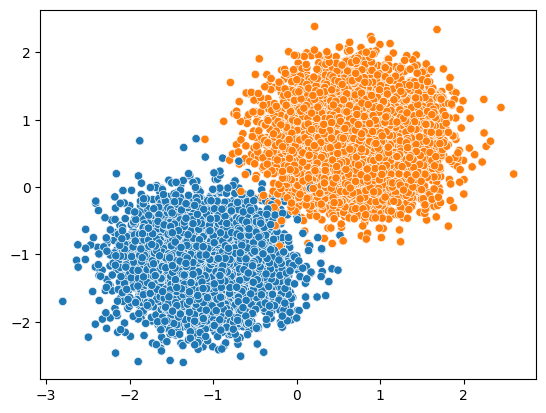

In [23]:
plot_data(blob_data, blob_features, blob_ROS_x, blob_ROS_y)

In [24]:
#correlationResults([cancer_standard,cancer_RAM_x, cancer_SMOTE_x, cancer_ADASYN_x, cancer_ROS_x], [cancer_data_default.target, cancer_RAM_y, cancer_SMOTE_y, cancer_ADASYN_y, cancer_ROS_y], default_dataset=cancer_standard, default_features=cancer_data_default.target)